In [1]:
import torch
import torchvision
from torchvision.datasets  import MNIST

## Torchvision has utitlities to work with image datas, and also has datasets

In [2]:
dataset = MNIST(root='data/', download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 22.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 609kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 5.63MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.65MB/s]


In [3]:
test_ds = MNIST(root='data/',train= False)

In [4]:
len(test_ds)

10000

In [5]:
train_ds =MNIST(root='data/',train= True)
len(train_ds)

60000

5


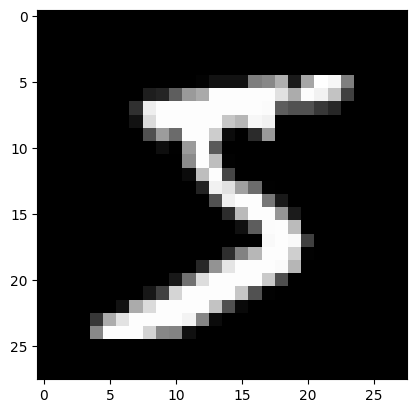

In [9]:
import matplotlib.pyplot as plt
image,label = train_ds[0]
plt.imshow(image, cmap= 'gray')
print(label)

## PyTorch cant intrpret images directly,  Images should be converted to Tensors to be understood by PyTorch, For this we are gonna use transforms module from pytorchvision

##  there are many such transforms in transform module, we can use more than one transofrms at a time to appply on teh image, when tehy are loaded

## We are gonna use .ToTensor() to Transform Image to Tensor.


In [6]:
import torchvision.transforms as transforms

In [7]:
dataset = MNIST(root = 'data/' , train = True , transform=torchvision.transforms.ToTensor())

In [8]:
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [9]:
image_tensor, label = dataset[0]
print(image_tensor.shape,label)

torch.Size([1, 28, 28]) 5


[1 28 28] (image is converted to 1x28x28 tensor)
Since teh images are grayscled, there is only 1 branch . COlored imags will have 3 branches (Red Green Blue, rgb colors)



# **Training and validation datasets**

## **Training Set** => used to train the model
## **Validation set** => used to evaluate model WHILE training , adjust hyperparameters (LR,etc) and pickup best version of model
## **Test Set** => Used to compare different models or used to compare different types of modelling aproach. Used to Report FInal Accuracy of model. Done to avoid OVERFITTING.

In [10]:
import numpy as np

In [11]:
def gen_split_indices(size,percentage):
  num = int(size*percentage)
  indices = np.random.permutation(size)
  return indices[num:], indices[:num]

In [12]:
train_indices, validation_indices = gen_split_indices(len(dataset),percentage=0.2)
print(train_indices)

[35550  5434 19813 ... 11949 36795  7517]


We have shuffled the indices for training and validation ds
Now we are gona use PyTorch DataLoaders


In [13]:
from torch.utils.data.dataloader import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

In [14]:
batch_size =100
train_subset = SubsetRandomSampler(train_indices)
validation_subset = SubsetRandomSampler(validation_indices)

train_loader = DataLoader(dataset, batch_size , sampler=train_subset)
validation_loader = DataLoader(dataset, batch_size, sampler = validation_subset)

This RandomSampler:
- Train or test only the Subset of our Dataset
- Used when we want the **SUBSET** to be sampled in Random Order

#What did Sampler does is, we are already passing the permuted inmdices to into the sample, it Says that only from these indices the the dataloader should load the images

## **Model**
- We are gonna use Logistic Regression here.
- Its also under nn.Linear class
- nn.Linear models only accepts Vectors (1-d arrays) as input, so we need to convert our [1 28 28] tensor into vector, this would be of size 28x28 which is 784, We gotta do it by flattenizing the tensor into vector of size 784
- The output vector's size of the model will be 10 , as the numbers are from 0 to 9.
- The output vector will be the PRobability of the input being 0,1,2..9 which will be displayed in the respective indices of the array

In [15]:
import torch.nn as nn
input_size = 28*28
output_size = 10
model = nn.Linear(input_size, output_size)
print(model)

Linear(in_features=784, out_features=10, bias=True)


In [16]:
model.weight
model.bias

Parameter containing:
tensor([-2.6030e-02, -2.4189e-02, -2.7554e-03, -1.1713e-02,  3.9986e-05,
        -6.7802e-04,  2.0621e-02, -1.4417e-02,  1.7016e-02,  6.2626e-03],
       requires_grad=True)

In [18]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0034,  0.0325, -0.0114,  ..., -0.0137,  0.0175, -0.0214],
        [ 0.0113,  0.0070, -0.0291,  ...,  0.0002, -0.0092, -0.0207],
        [-0.0210,  0.0233, -0.0198,  ..., -0.0038,  0.0165, -0.0175],
        ...,
        [ 0.0184,  0.0329,  0.0161,  ...,  0.0095, -0.0204,  0.0052],
        [ 0.0150,  0.0260,  0.0147,  ...,  0.0025,  0.0244, -0.0181],
        [ 0.0253, -0.0259, -0.0296,  ...,  0.0290,  0.0081,  0.0004]],
       requires_grad=True)

In [19]:
print(model.bias)

Parameter containing:
tensor([-2.6030e-02, -2.4189e-02, -2.7554e-03, -1.1713e-02,  3.9986e-05,
        -6.7802e-04,  2.0621e-02, -1.4417e-02,  1.7016e-02,  6.2626e-03],
       requires_grad=True)


In the below for loop, Images and Labels are taken as batches of 100 from th e train_loader and the model is trained.

In [20]:

for images, labels in train_loader:
  print(labels)
  print(images.shape)
  outputs = model(images)
  break



tensor([9, 4, 7, 5, 3, 4, 9, 2, 7, 2, 3, 6, 9, 0, 7, 3, 7, 1, 2, 0, 5, 8, 3, 9,
        1, 5, 3, 8, 5, 7, 6, 6, 7, 6, 9, 2, 6, 7, 9, 5, 3, 7, 2, 8, 6, 3, 1, 8,
        9, 5, 2, 9, 3, 8, 8, 4, 7, 6, 3, 8, 5, 0, 2, 4, 9, 3, 1, 8, 5, 2, 6, 3,
        7, 4, 2, 9, 2, 8, 0, 5, 7, 1, 0, 7, 8, 1, 4, 9, 0, 0, 1, 5, 7, 6, 2, 3,
        3, 6, 8, 8])
torch.Size([100, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2800x28 and 784x10)

This error was because, we have directlybpassed images as [100 1 28 28] tensor and not as a flattened vector

This can be solved by using .reshape method of a tensor which allow us to efficiently 'view'image as FLAT VECTOR weithou changing any underlying data

In [35]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size,output_size)

  def forward(self,xb):
    xb = xb.reshape(-1,784)
    output = self.linear(xb)
    return output

model = MnistModel()
print(model)

MnistModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [39]:
for images,labels in train_loader:
  predictionss = model(images)
  print(predictionss.shape)
  print("sample output:", predictionss[:2])
  break

torch.Size([100, 10])
sample output: tensor([[ 0.2988, -0.0288,  0.1663,  0.0738,  0.0680,  0.1320,  0.1635, -0.1632,
          0.4531,  0.1351],
        [ 0.2903, -0.0411, -0.0179,  0.0839,  0.0223, -0.1262,  0.0334,  0.0719,
          0.1844,  0.0524]], grad_fn=<SliceBackward0>)


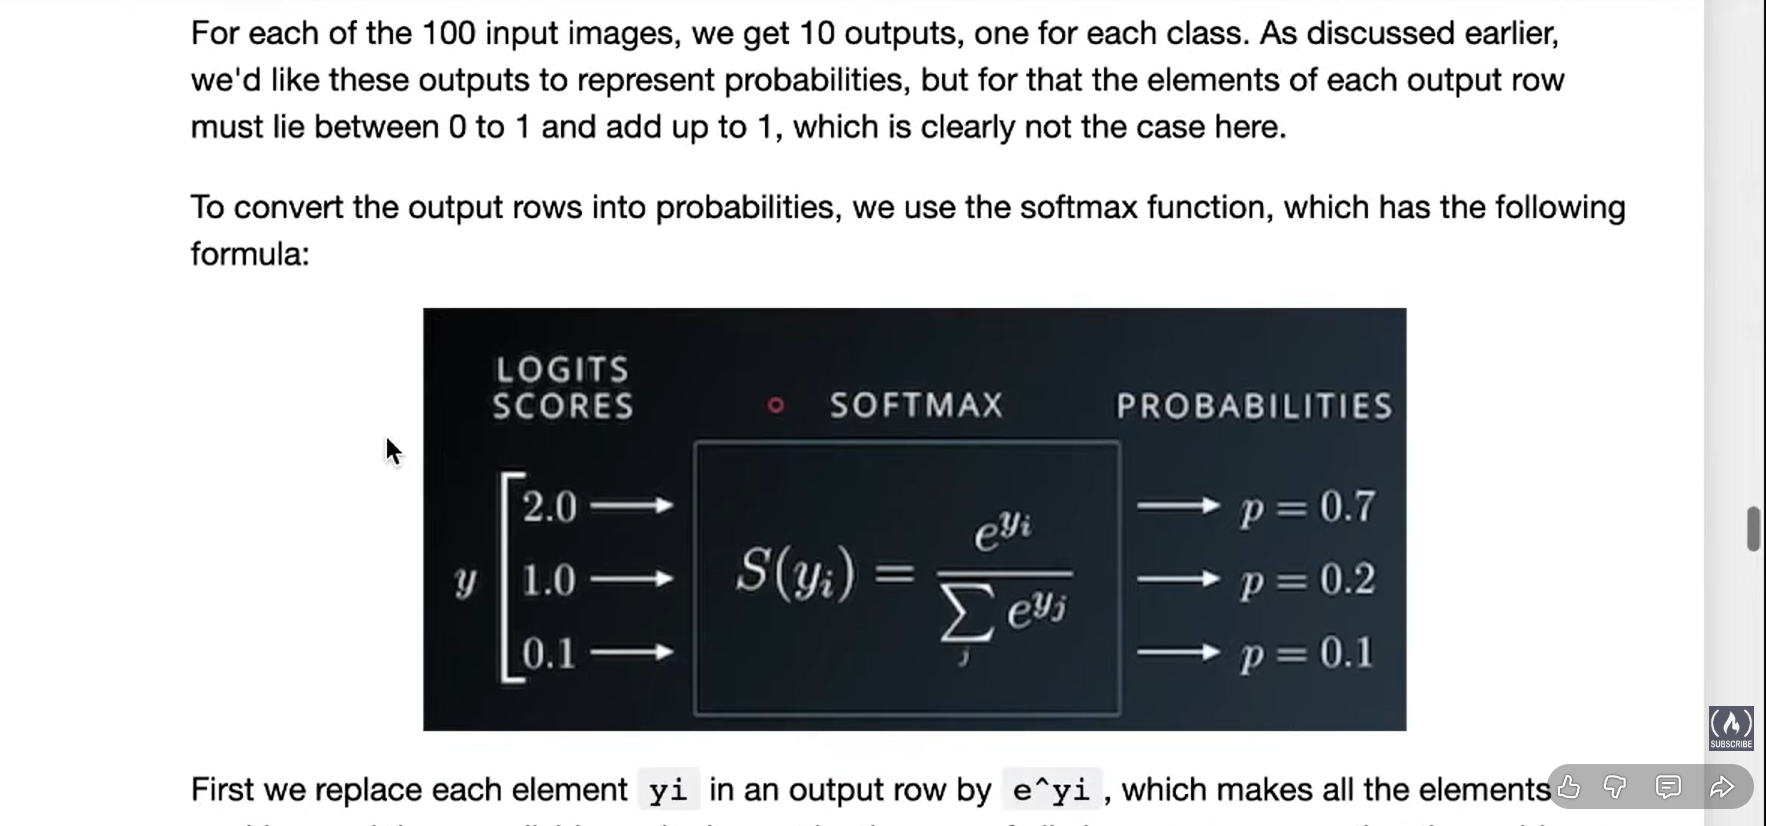

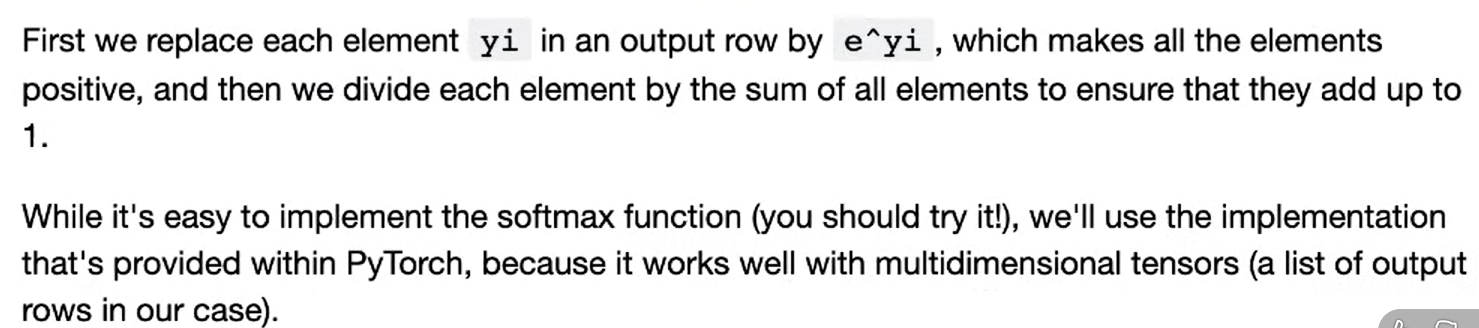

In [40]:
import torch.nn.functional as F

In [41]:
#Now we are going to Convert the output nto [robability values using Softmax function
output = F.softmax(predictionss, dim=1)
print(output[:2])

tensor([[0.1169, 0.0842, 0.1024, 0.0933, 0.0928, 0.0989, 0.1021, 0.0736, 0.1364,
         0.0992],
        [0.1257, 0.0902, 0.0924, 0.1023, 0.0961, 0.0829, 0.0972, 0.1010, 0.1131,
         0.0991]], grad_fn=<SliceBackward0>)


In [42]:
max_probability, predictions = torch.max(output, dim=1)
print(max_probability)
print(predictions)

tensor([0.1364, 0.1257, 0.1424, 0.1244, 0.1217, 0.1384, 0.1228, 0.1742, 0.1433,
        0.1874, 0.1243, 0.1265, 0.1195, 0.1175, 0.1272, 0.1452, 0.1286, 0.1156,
        0.1309, 0.1464, 0.1148, 0.1489, 0.1231, 0.2009, 0.1124, 0.1482, 0.1269,
        0.1339, 0.1376, 0.1228, 0.1202, 0.1319, 0.1377, 0.1135, 0.1373, 0.1239,
        0.1581, 0.1477, 0.1353, 0.1461, 0.1606, 0.1347, 0.1455, 0.1168, 0.1236,
        0.1141, 0.1139, 0.1204, 0.1380, 0.1335, 0.1268, 0.1371, 0.1638, 0.1220,
        0.1292, 0.1342, 0.1132, 0.1258, 0.1155, 0.1230, 0.1387, 0.1303, 0.1101,
        0.1261, 0.1224, 0.1434, 0.1189, 0.1220, 0.1222, 0.1248, 0.1478, 0.1206,
        0.1128, 0.1231, 0.1167, 0.1598, 0.1435, 0.1188, 0.1260, 0.1166, 0.1226,
        0.1138, 0.2029, 0.1193, 0.1253, 0.1126, 0.1321, 0.1145, 0.1164, 0.1331,
        0.1119, 0.1219, 0.1259, 0.1484, 0.1555, 0.1164, 0.1232, 0.1289, 0.1422,
        0.1478], grad_fn=<MaxBackward0>)
tensor([8, 0, 8, 8, 5, 2, 4, 8, 8, 8, 6, 4, 8, 9, 0, 8, 8, 8, 8, 8, 3, 8, 3, 8,

In [43]:
print(labels)

tensor([9, 3, 8, 8, 4, 0, 7, 0, 7, 0, 7, 9, 2, 6, 9, 0, 9, 1, 7, 0, 6, 8, 6, 0,
        1, 5, 5, 1, 3, 3, 6, 7, 8, 6, 6, 7, 3, 9, 0, 8, 0, 9, 9, 6, 7, 6, 1, 6,
        5, 4, 6, 4, 8, 1, 8, 6, 1, 9, 4, 4, 2, 6, 6, 2, 9, 7, 4, 7, 3, 1, 0, 7,
        6, 6, 7, 6, 9, 4, 6, 0, 7, 7, 0, 7, 6, 1, 6, 1, 5, 0, 1, 1, 8, 8, 5, 6,
        8, 3, 8, 2])


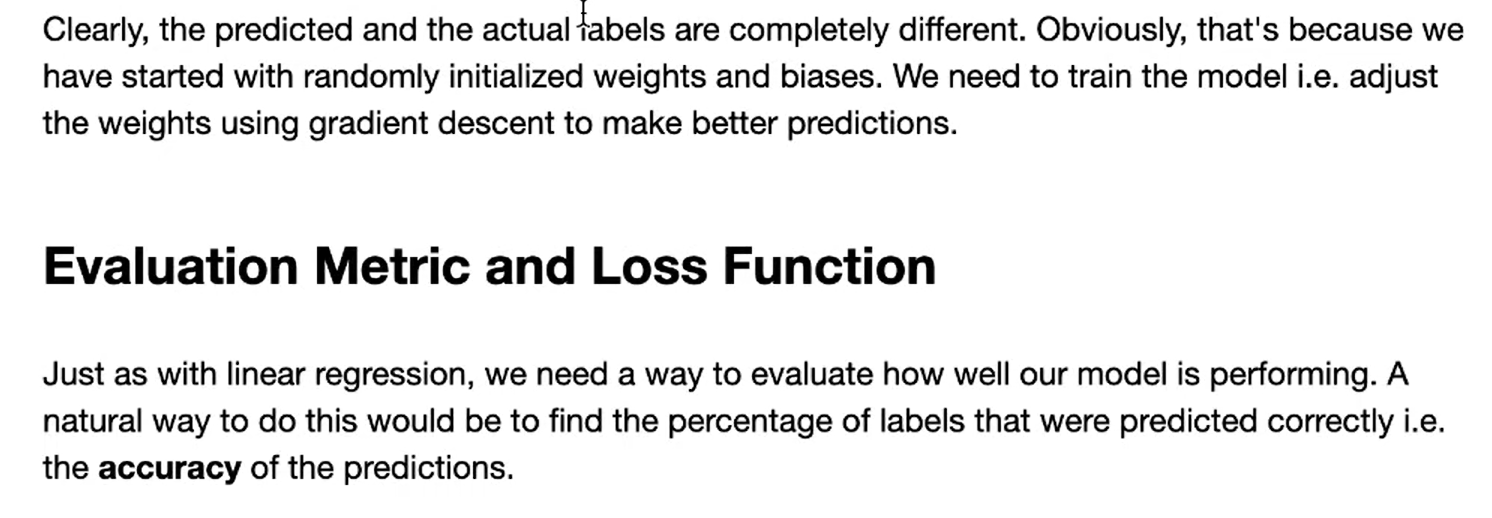

In [44]:
def accuracy(pred,op):
  return torch.sum(pred == op).item()/len(pred)

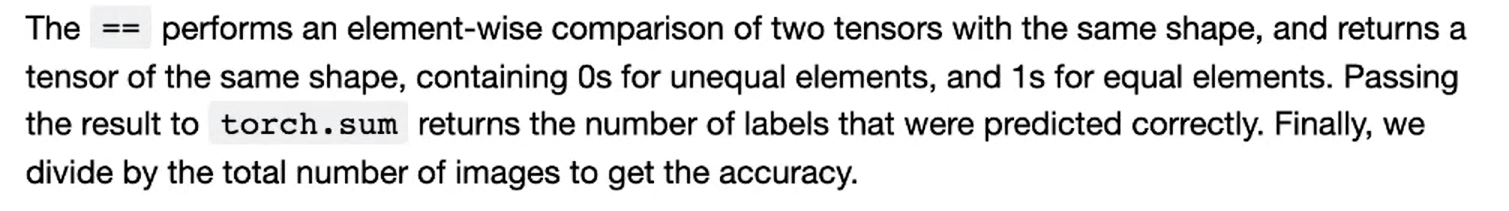

In [45]:
print(accuracy(predictions,labels))

0.13


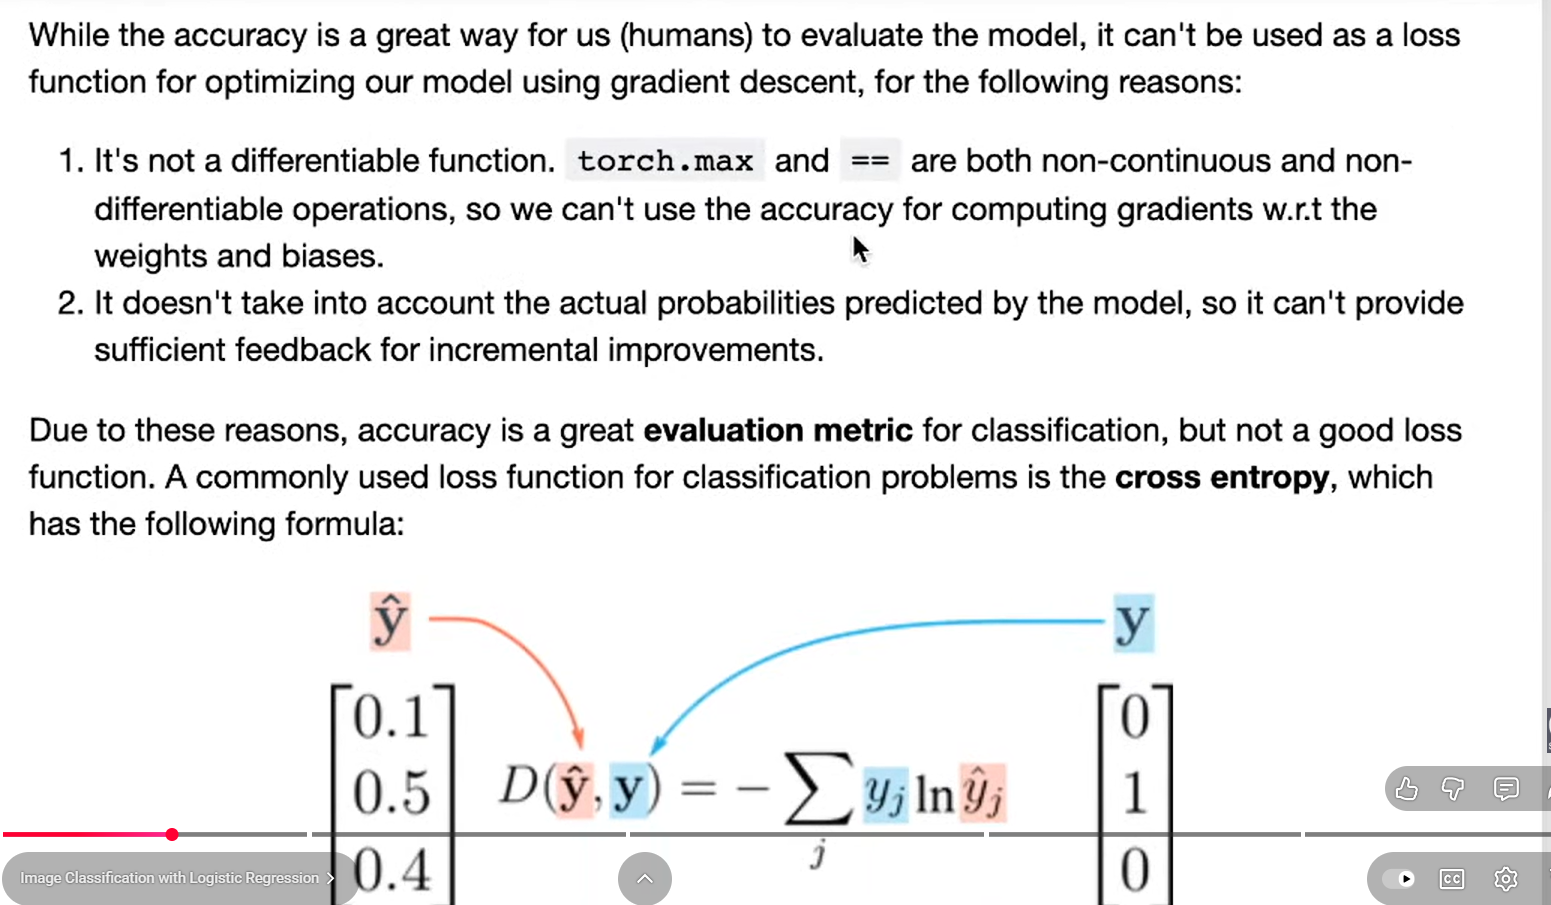

In [46]:
loss_fn = F.cross_entropy

In [50]:
loss = loss_fn(output,labels) #Output is the vector of probabilities
print(loss)

tensor(2.3024, grad_fn=<NllLossBackward0>)


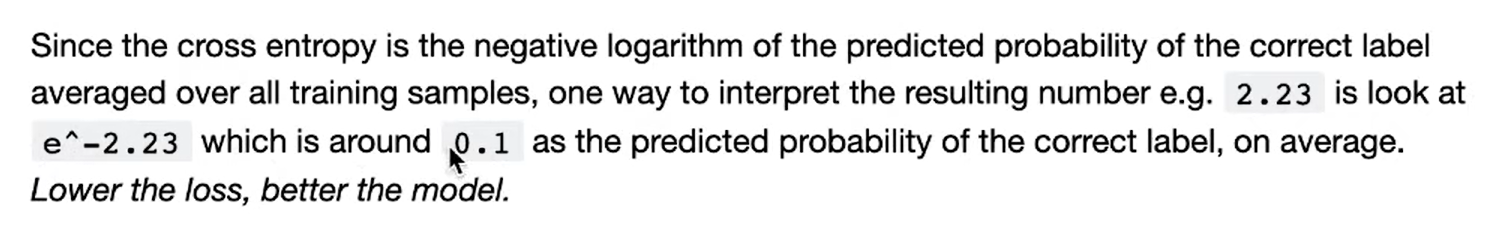

In [53]:
lr = 0.0001
optimizer = torch.optim.SGD(model.parameters(), lr=lr) #USed to update weights and bisas of model while training

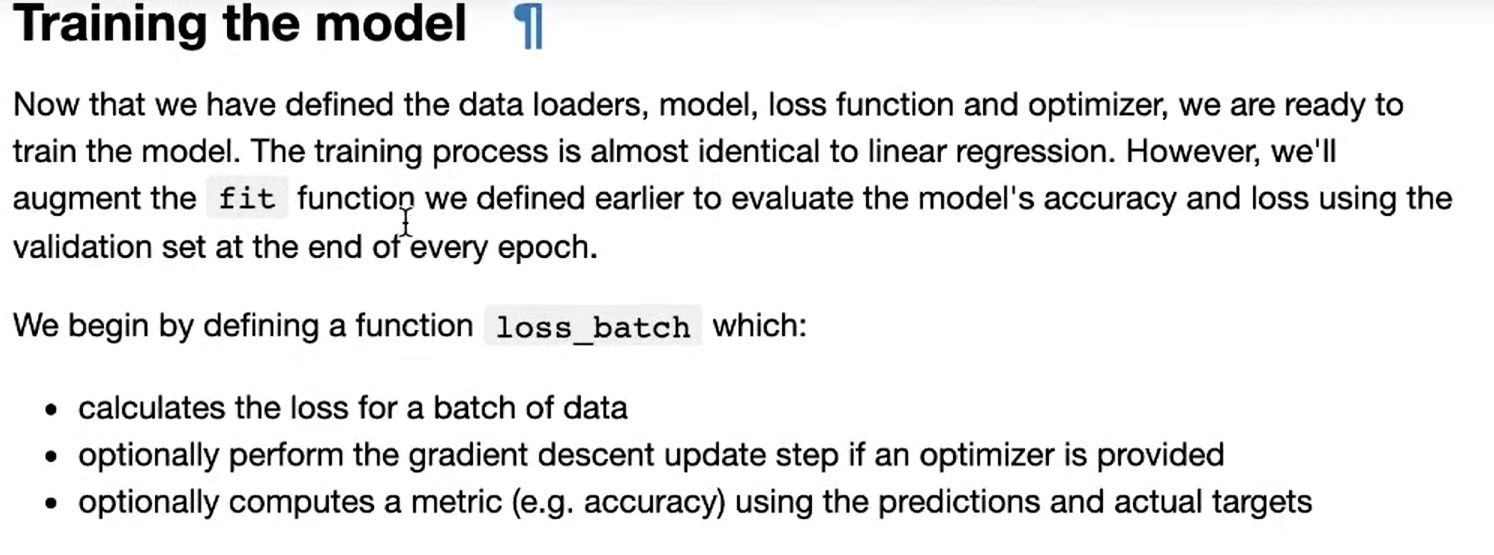

In [55]:
def loss_batch(model,loss_fn,xb,yb,optimizer=None,metric=None):
    predictions = model(xb)
    loss = loss_fn(predictions,yb)

    if optimizer is not None:
       loss.backward()
       optimizer.step()
       optimizer.zero_grad()

    metric_result = None
    if metric is not None:
      metric_result = metric(predictions,yb)

    return loss.item(),len(xb),metric_result



In [58]:
def evaluate(loss_fn,model, valid_dl,optimizer=None,metric=None):
  with torch.no_grad():
    #getting results from loss_batch
    results = [loss_batch(model,loss_fn,xb,yb,optimizer,metric) for xb,yb in valid_dl]
    losses,nums,metrics = zip(*results)
    tot_size_ds = np.sum(nums)
    avg_loss = np.sum(np.multiply(losses,nums))/tot_size_ds
    if metric is not None:
      avg_metric = np.sum(np.multiply(metrics,nums))/tot_size_ds
    else:
      avg_metric = None
    return avg_loss,tot_size_ds,avg_metric


In [64]:
def accuracy(predictions,labels):
  _,preds = torch.max(predictions, dim=1)
  return torch.sum(preds==labels).item()/len(preds)

In [66]:
avg_loss, total, avg_metric = evaluate(loss_fn,model,train_loader,metric=accuracy)
print(avg_loss,avg_metric)

2.347693845629692 0.09802083333333333


In [71]:
def fit(epochs, model,opt, loss_fn, valid_dl,metric):
  for epoch in range(epochs):
    for xb,yb in valid_dl:
      loss,_,_ = loss_batch(model,loss_fn,xb,yb,opt,metric)
    validation_loss , _ , validation_metric = evaluate(loss_fn,model,valid_dl,metric=metric)
    print("Epoch: {}/{} , loss: {},Metric: {}".format(epoch+1,epochs,validation_loss,validation_metric))


In [72]:
fit(20,model,optimizer,loss_fn,train_loader,accuracy)

Epoch: 1/20 , loss: 2.2460636009772617,Metric: 0.1733125
Epoch: 2/20 , loss: 2.198188543319702,Metric: 0.2523125
Epoch: 3/20 , loss: 2.152064555386702,Metric: 0.35291666666666666
Epoch: 4/20 , loss: 2.107583156724771,Metric: 0.44175
Epoch: 5/20 , loss: 2.0646647001306215,Metric: 0.5075
Epoch: 6/20 , loss: 2.0232463936010996,Metric: 0.5552708333333334
Epoch: 7/20 , loss: 1.9832621557017167,Metric: 0.5933125
Epoch: 8/20 , loss: 1.9446671118338903,Metric: 0.623
Epoch: 9/20 , loss: 1.9074149951338768,Metric: 0.6468125
Epoch: 10/20 , loss: 1.8714592665433885,Metric: 0.6653333333333333
Epoch: 11/20 , loss: 1.8367596792678038,Metric: 0.6805625
Epoch: 12/20 , loss: 1.8032747430106004,Metric: 0.6934583333333333
Epoch: 13/20 , loss: 1.7709634870290756,Metric: 0.7046041666666667
Epoch: 14/20 , loss: 1.7397868648171424,Metric: 0.7138125
Epoch: 15/20 , loss: 1.7097082272171975,Metric: 0.7227708333333334
Epoch: 16/20 , loss: 1.6806855810185273,Metric: 0.72975
Epoch: 17/20 , loss: 1.652680482963721,M

- We could not achieve accuracy above 85-87% with this model how much ever we try, This is due to the fact that its just a linear model